# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {2307ACDS_Team_NM1}}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


# Table of Contents

1. [Introduction](#project-overview)
2. [Importing Packages](#import-necessary-libraries)
3. [Load the Dataset](#load-the-dataset)
4. [Explore the Dataset](#explore-the-dataset)
5. [Preprocess the Text Data](#preprocess-the-text-data)
6. [Split the Dataset into Training and Testing Sets](#split-the-dataset-into-training-and-testing-sets)
7. [Build a Basic Classification Model](#build-a-basic-classification-model)
8. [Evaluate the Model on the Test Set](#evaluate-the-model-on-the-test-set)
9. [Predict Sentiments for the Provided Test Dataset](#predict-sentiments-for-the-provided-test-dataset)
10. [Prepare the Submission File](#prepare-the-submission-file)
11. [Conclusion](#prepare-the-submission-file)
12. [References](#prepare-the-submission-file)

## 1. Introduction


### 1.1. Predict Overview: Climate Change Sentiment Analysis


Many businesses are established with a mission to minimize environmental impact and carbon emissions. They offer sustainable and eco-friendly products and services that align with their core values. To improve their market research efforts in evaluating potential consumer reception, these companies seek to understand public perceptions of climate change and whether individuals perceive it as a legitimate threat.

This project aims to develop a machine learning model for classifying beliefs in climate change based on tweet data. Providing accurate insights for marketing strategies, this solution is valuable to companies. Climate change is gaining traction in corporate social responsibility policies and private companies are taking voluntary measures to offset their environmental impacts ahead of regulations.

Public perceptions of climate change generally follow a pattern similar to that seen with natural disasters. Individuals who are currently experiencing impacts they associate with climate change tend to believe in its existence and take action by reducing greenhouse gas emissions and adapting to its effects. However, as a whole, the public often perceives climate change impacts as distant both spatially and temporally. It is important for future research to further understand these perceptions and find effective ways to communicate about the urgency of addressing climate change.


### Data Source
The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

### Class Description

- 2 News: the tweet links to factual news about climate change.

- 1 Pro: the tweet supports the belief of man-made climate change.

- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change.

- -1 Anti: the tweet does not believe in man-made climate change. 

### Features

- Sentiment: Which class a tweet belongs in (refer to Class Description above)

- Message: Tweet body

- Tweetid: Twitter unique id


## 2. Importing Packages


In [36]:
from comet_ml import Experiment
from comet_ml.integration.sklearn import log_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
%matplotlib inline

import contractions
import nltk
import re
import string
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')
from nltk import SnowballStemmer
#from pandas_profiling import ProfileReport
from textblob import TextBlob


# imports for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score,precision_score,recall_score,roc_curve, roc_auc_score
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.metrics import ConfusionMatrixDisplay

#global parameters
additional  = ['retweet', 've', 'RT']
all_stop = (stopwords.words('english'), additional)

import warnings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bonan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bonan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bonan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bonan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bonan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 3. Initiate Comet

#### Setting the API key (saved as environment variable)

In [37]:
experiment = Experiment(
  api_key="Pi7lAX5Amd6kvaBVBEB3qqSYV",
  project_name="Classification_Sprint_2307ACDS_Team_NM1",
  workspace="bonanimkhari-gmail-com"
)


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/bonanimkhari-gmail-com/classification-sprint-2307acds-team-nm1/772b3a927b85407f94d8ef2ea7498fed
COMET INFO:   Metrics:
COMET INFO:     accuracy      : 0.7675227182931648
COMET INFO:     f1            : 0.7064520862407757
COMET INFO:     f1_test       : 0.5513052898455452
COMET INFO:     precision     : 0.7305619729790037
COMET INFO:     recall        : 0.6888759037654162
COMET INFO:     training_time : 10.021980399964377
COMET INFO:   Parameters:
COMET INFO:     C                                    : 1.0
COMET INFO:     algorithm                            : auto
COMET INFO:     bootstrap                            : True
COMET 

COMET INFO:     learning_rate                        : 0.1
COMET INFO:     loss                                 : squared_hinge
COMET INFO:     max_depth                            : 3
COMET INFO:     max_features                         : None
COMET INFO:     max_iter                             : 1000
COMET INFO:     max_leaf_nodes                       : None
COMET INFO:     max_samples                          : None
COMET INFO:     memory                               : None
COMET INFO:     metric                               : minkowski
COMET INFO:     metric_params                        : None
COMET INFO:     min_impurity_decrease                : 0.0
COMET INFO:     min_samples_leaf                     : 1
COMET INFO:     min_samples_split                    : 2
COMET INFO:     min_weight_fraction_leaf             : 0.0
COMET INFO:     model_type                           : logreg
COMET INFO:     multi_class                          : ovr
COMET INFO:     n_estimators         


## 4. Load the Dataset


In this section, the data files were loaded, previewed, shape assessed, information gathered, and the data checked for null values in both the train and test datasets.

### 4.1. Train Data

In [38]:
#Load data from GitHub contained in csv files. 
df_train = pd.read_csv("https://raw.githubusercontent.com/Bonani-Hazel-Mkhari/Data/main/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/Bonani-Hazel-Mkhari/Data/main/test_with_no_labels.csv")

In [39]:
df_train.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [40]:
df_train.shape

(15819, 3)

In [41]:
# Checking null values in the train dataset.
print("The number of null values in train set  is", df_train.isnull().sum().sum())

The number of null values in train set  is 0


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


#### NOTES

- The train dataset was seen to contain 3 coloumns with 15819 entries. 
- The dataset had no null values 
- Two coloumns, sentiment and tweetid were of the type int64 and message was of type object. 




### 4.2.Test Data

In [43]:
df_test.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

In [44]:
df_test.shape

(10546, 2)

In [45]:
# Checking null values in the test dataset.
print("The number of null values in test set  is", df_test.isnull().sum().sum())

The number of null values in test set  is 0


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


#### NOTES

- Test data contained 2 coloumns, tweetid and message, with 10546 entries. 
- Test data has no null values and the two present coloumns are of type object. 
- Sentiments are divided into 4 groups and will give insight into whether or not a person believes in climate change. Testing model to predict 'sentiment' based on the messeage in the tweet. 


## 5.Explore the Dataset - EDA

In this section an in-depth analysis of the data provded in carried out, to derive existing insights, patterns and structure of the data and how it influences or correlates with the sentiment to be predicted. 

In [47]:
# Identify unique sentiments in data
unique_sentiments = df_train['sentiment'].unique()

# Print the unique values
print("Unique Sentiment Codes:", unique_sentiments)

Unique Sentiment Codes: [ 1  2  0 -1]


#### NOTES 

- The data only contains the expected 4 unique sentiment codes and no other numbers. Sentiment coloum to be used with no feature engineering. 

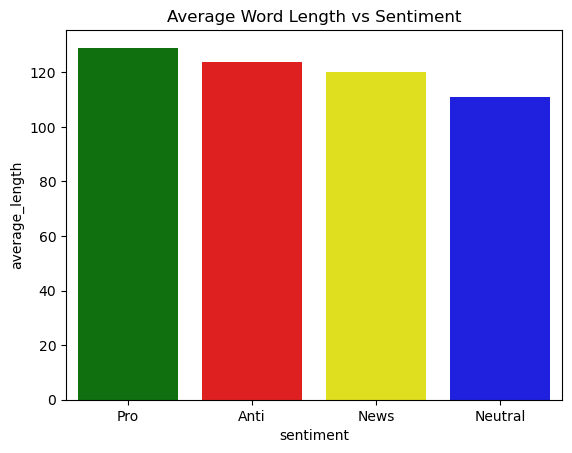

In [48]:
#Assess average message length based on sentiment code. 
# Average word length vs sentiment
# Create a DataFrame for plotting
custom_palette = {2: 'yellow', 1: 'green', 0: 'blue', -1: 'red'}

df_train['length'] = df_train['message'].apply(len)
average_lengths = df_train.groupby('sentiment')['length'].mean().sort_values(ascending=False)
plot_df = pd.DataFrame({'sentiment': average_lengths.index, 'average_length': average_lengths.values})

# Plotting in descending order
fig1 = sns.barplot(x='sentiment', y='average_length', palette=custom_palette, data=plot_df, order=average_lengths.index)
plt.title('Average Word Length vs Sentiment')
plt.xticks(ticks=[0, 1, 2, 3],labels=['Pro','Anti', 'News','Neutral'])

plt.show()

#### NOTES 

- Observations revealed that those pro climate change had the longest average messages, followed by those who were anti climate change, followed by news publications and lastly, tweets from neutral parties had the shortest average messages. 
- Lack of interest from neutral parties was evident from the short average message length while the enthusiasm and passion of those who are pro climate change is evident in their longer tweets. 

### Target Variable Distribution 

Assessing class imbalance in the data. 

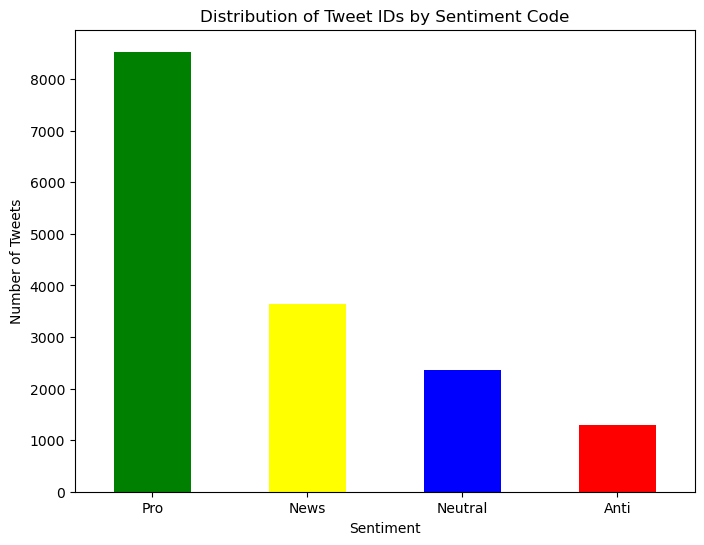

In [49]:
sentiment_counts = df_train['sentiment'].value_counts()

custom_palette = {2: 'yellow', 1: 'green', 0: 'blue', -1: 'red'}


# Define custom labels for sentiment codes
sentiment_labels = {1: 'Pro', -1: 'Anti', 2: 'News', 0: 'Neutral'}

# Plot the distribution with custom colors and labels, sorted by sentiment code
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=[custom_palette[code] for code in sentiment_counts.index])

# Set custom labels for x-axis
plt.xticks(range(len(sentiment_labels)), [sentiment_labels[code] for code in sentiment_counts.index], rotation=0)

plt.title('Distribution of Tweet IDs by Sentiment Code')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

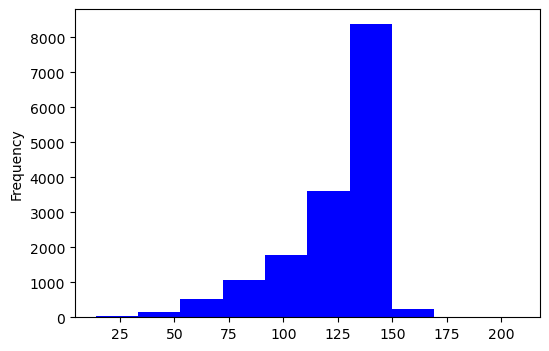

In [50]:
# checking the distribution of tweet length in the dataset
length_train = df_train['message'].str.len().plot.hist(color = 'blue', figsize = (6, 4))

#### NOTES

- There are far more tweets from people who are pro climate change as seen by the large count of 8530 tweets. 
- Even with  longer average message length, those who were anti climate change, tweeted the least about climate change with a sentiment count of 1296. 
- News publications tweeted 3640 times about climate change, while neutral parties tweeted 2353 times about climate change. 



In [51]:
#define a function to easily plot tweet sentiments top words:
def plot_word_cloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24, 16), title=None, title_size=40, image_color=False):
    wordcloud = WordCloud(background_color='white', max_words = max_words, max_font_size=max_font_size, random_state=42, width=800, height=400, mask=mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear');
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    plt.axis=('off')
    plt.tight_layout()

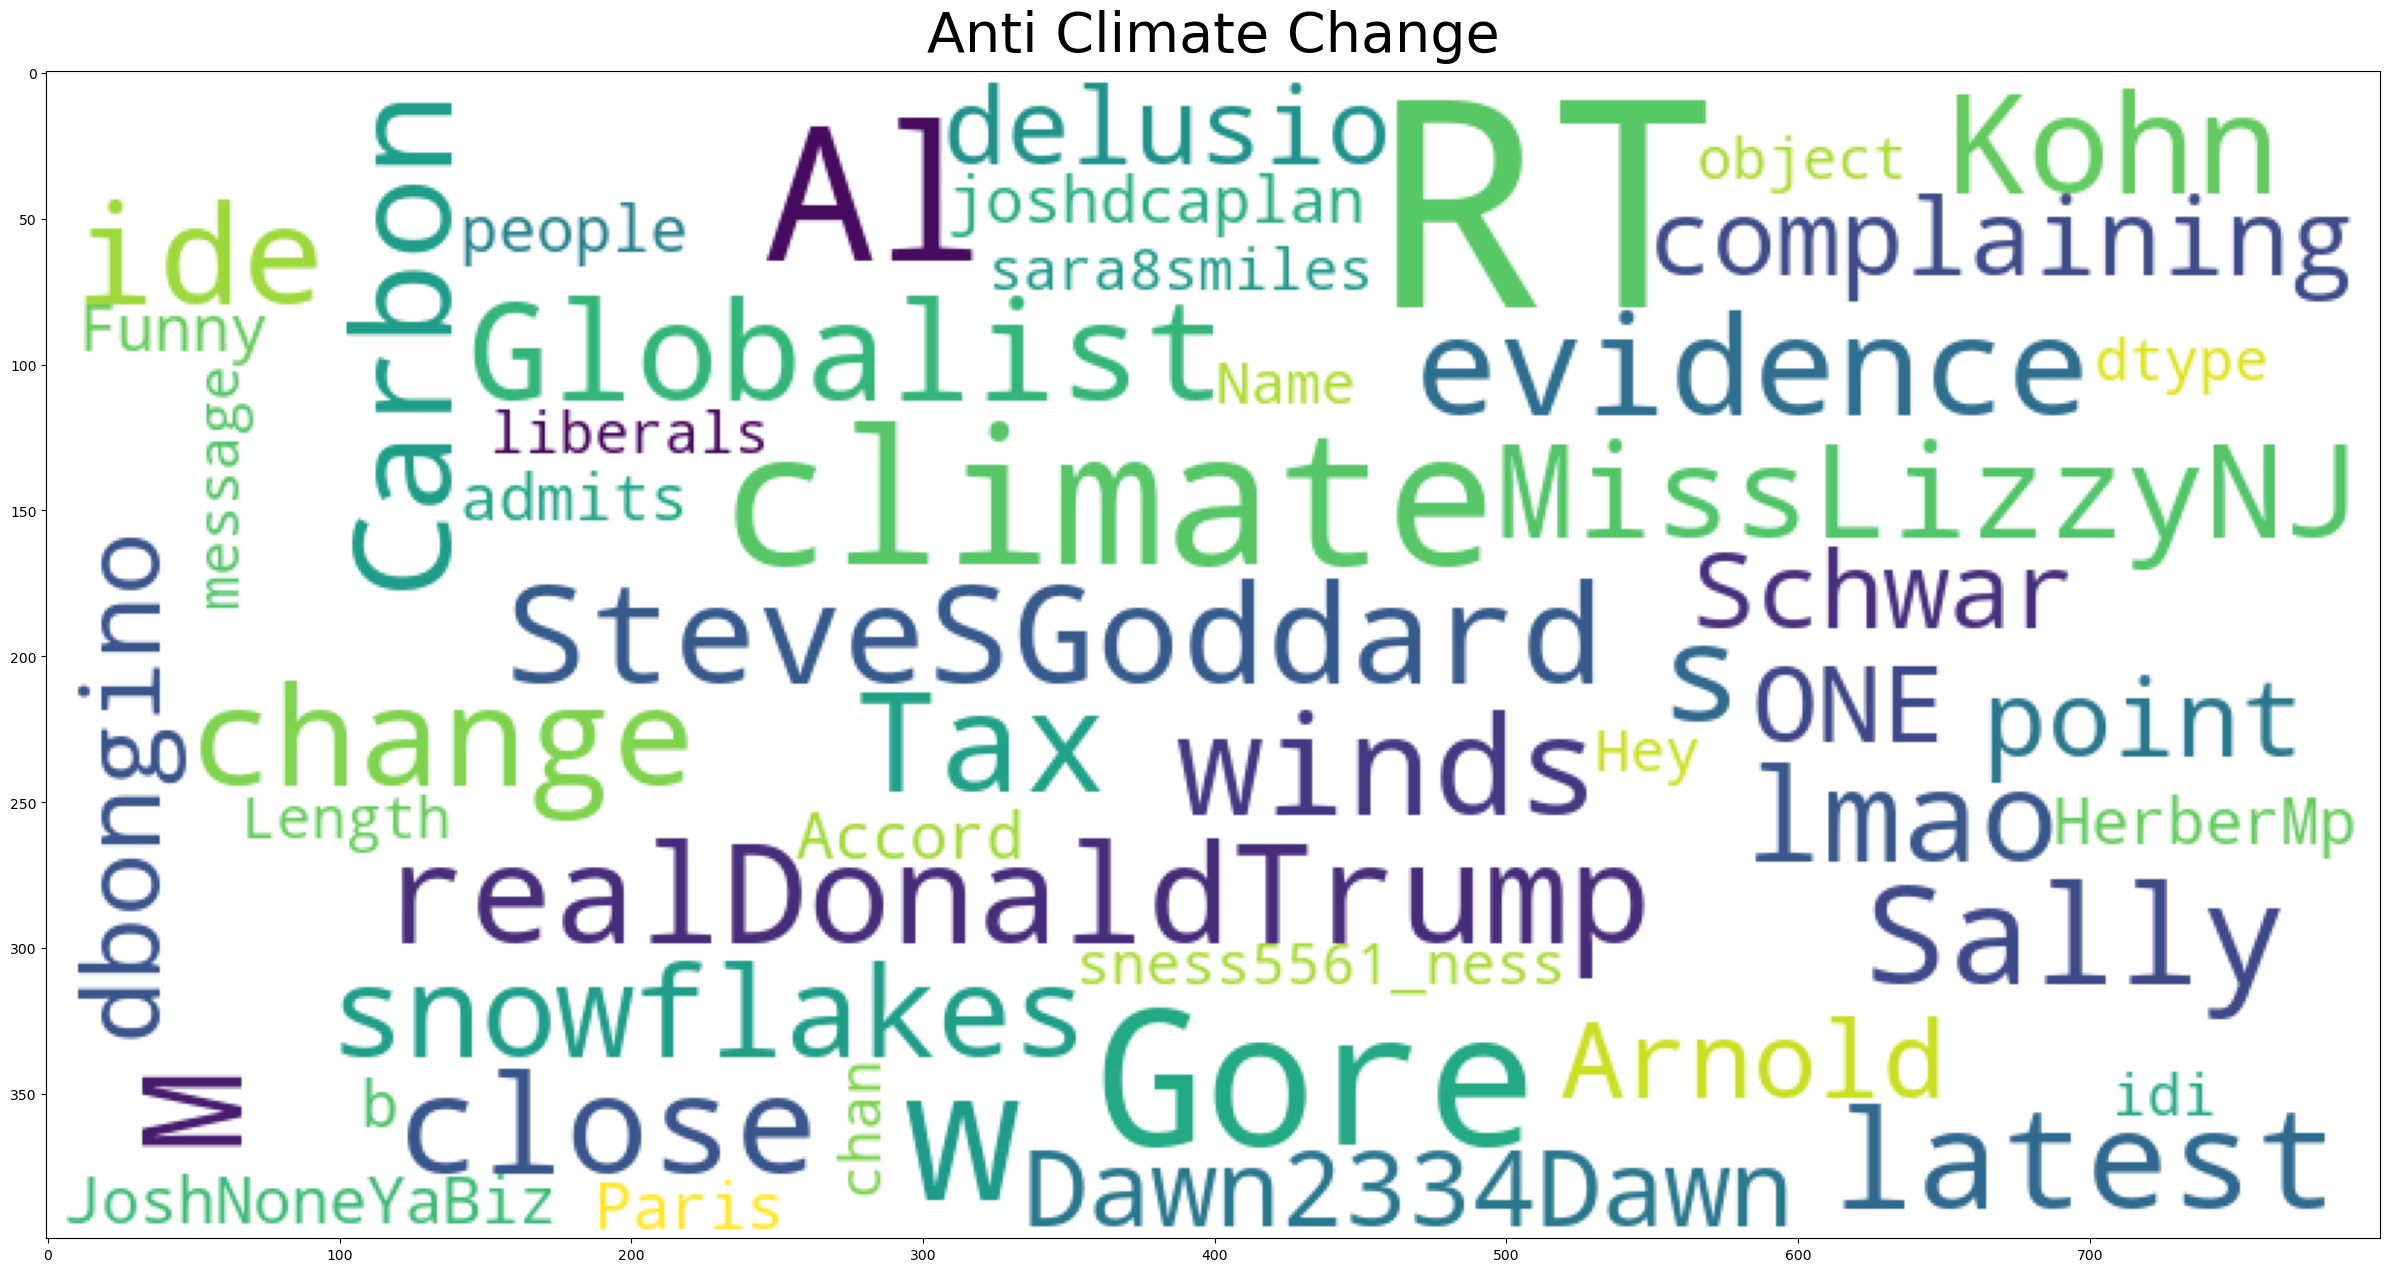

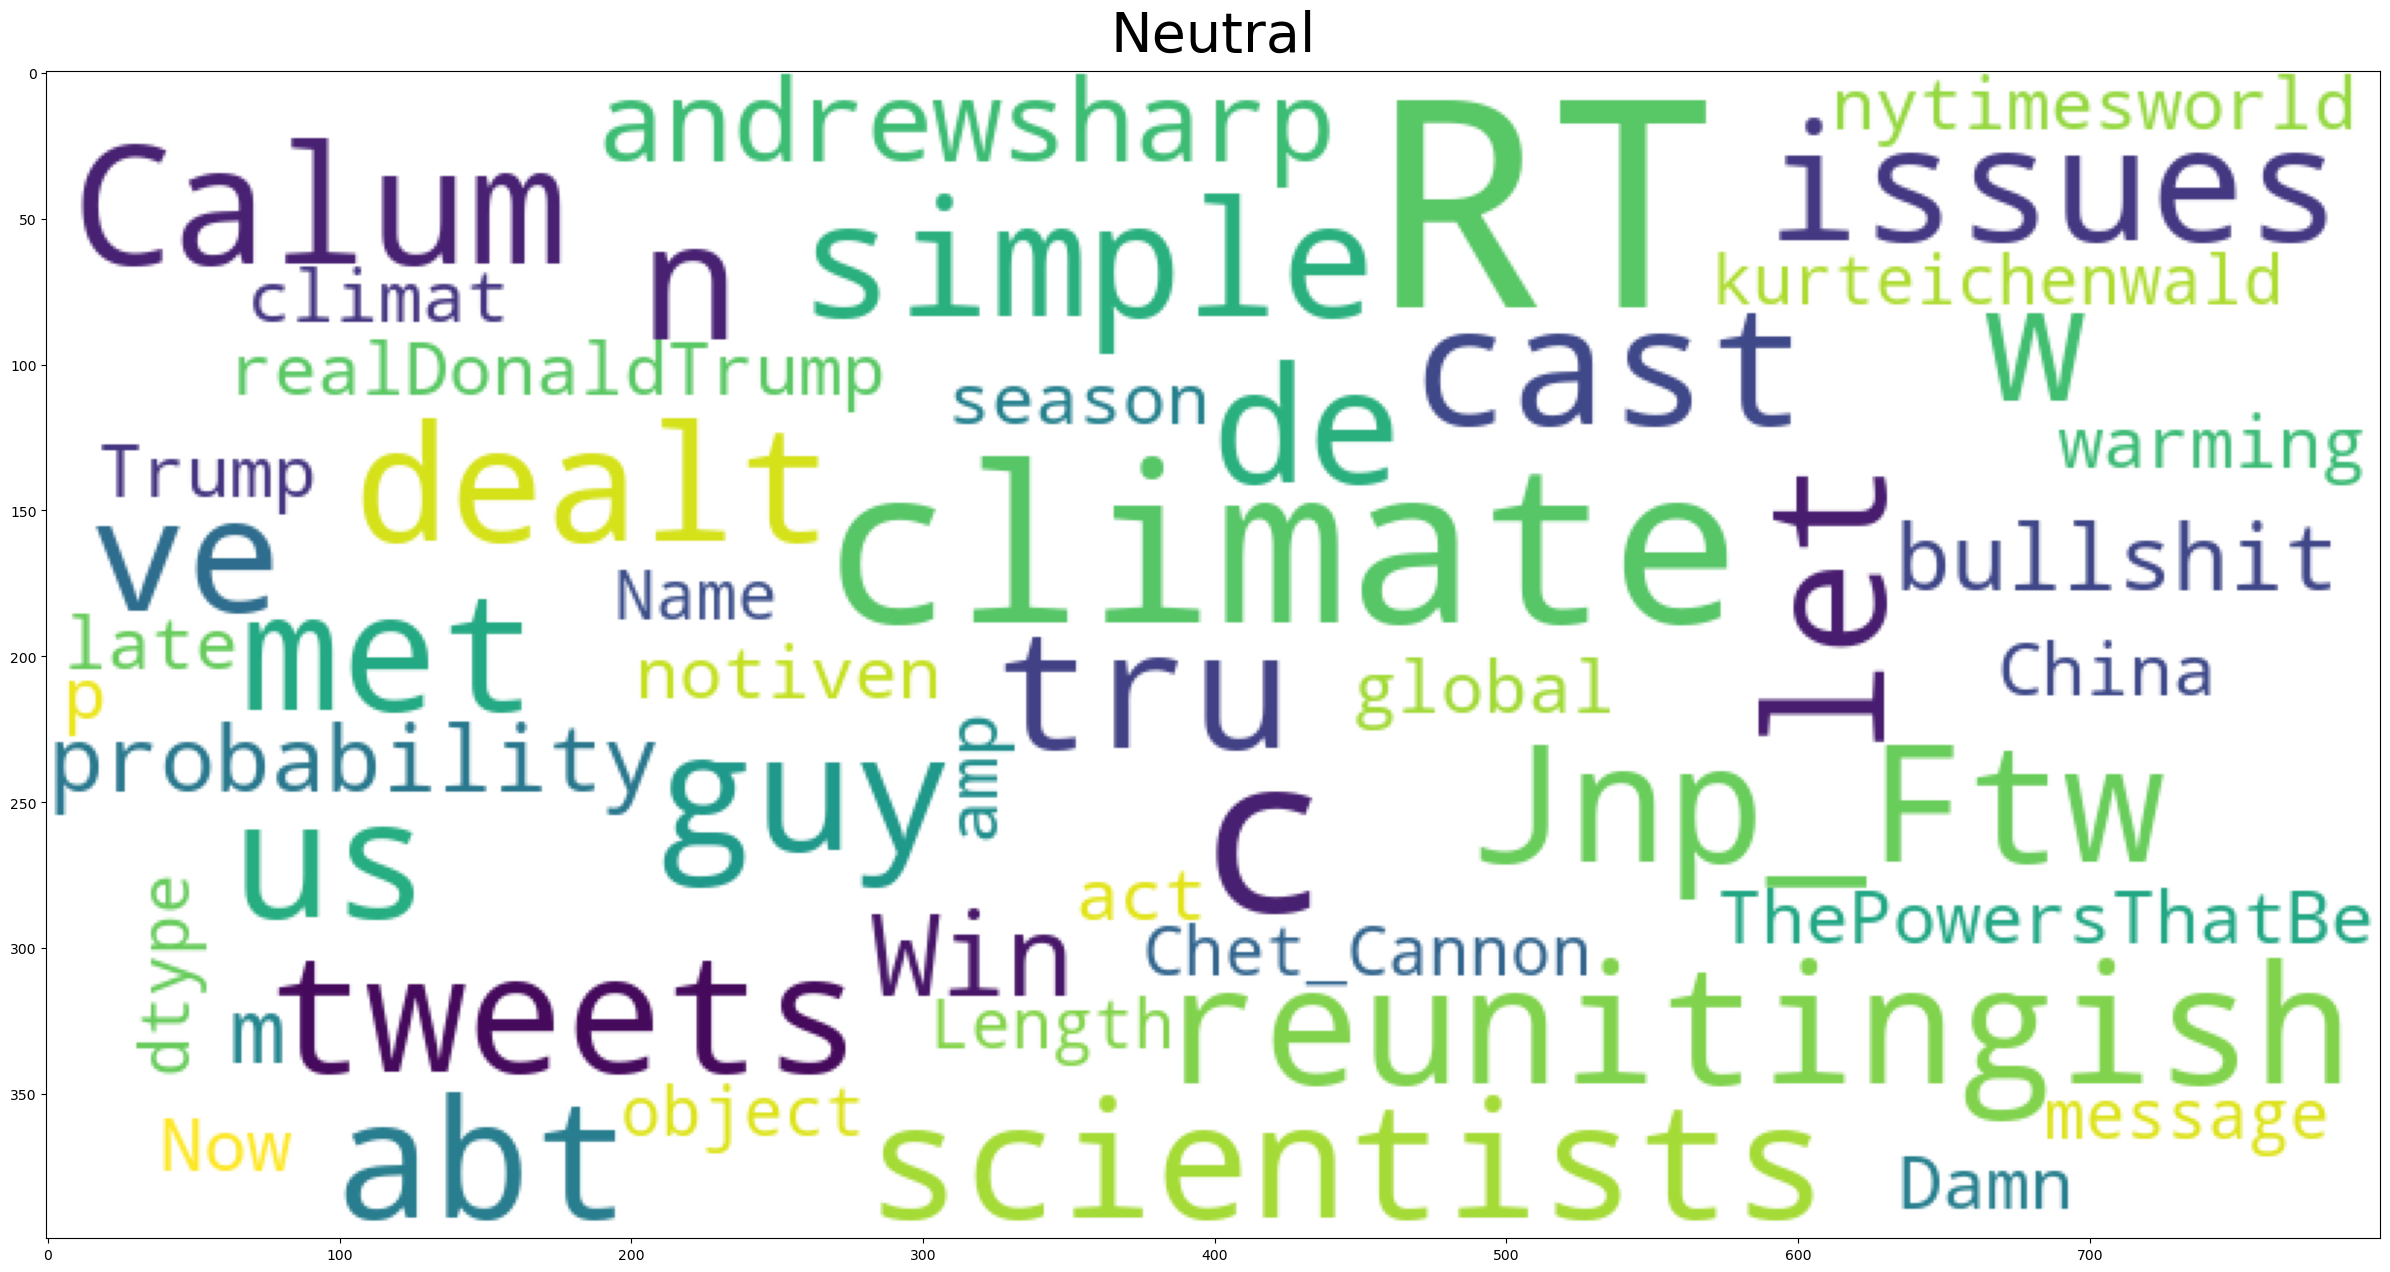

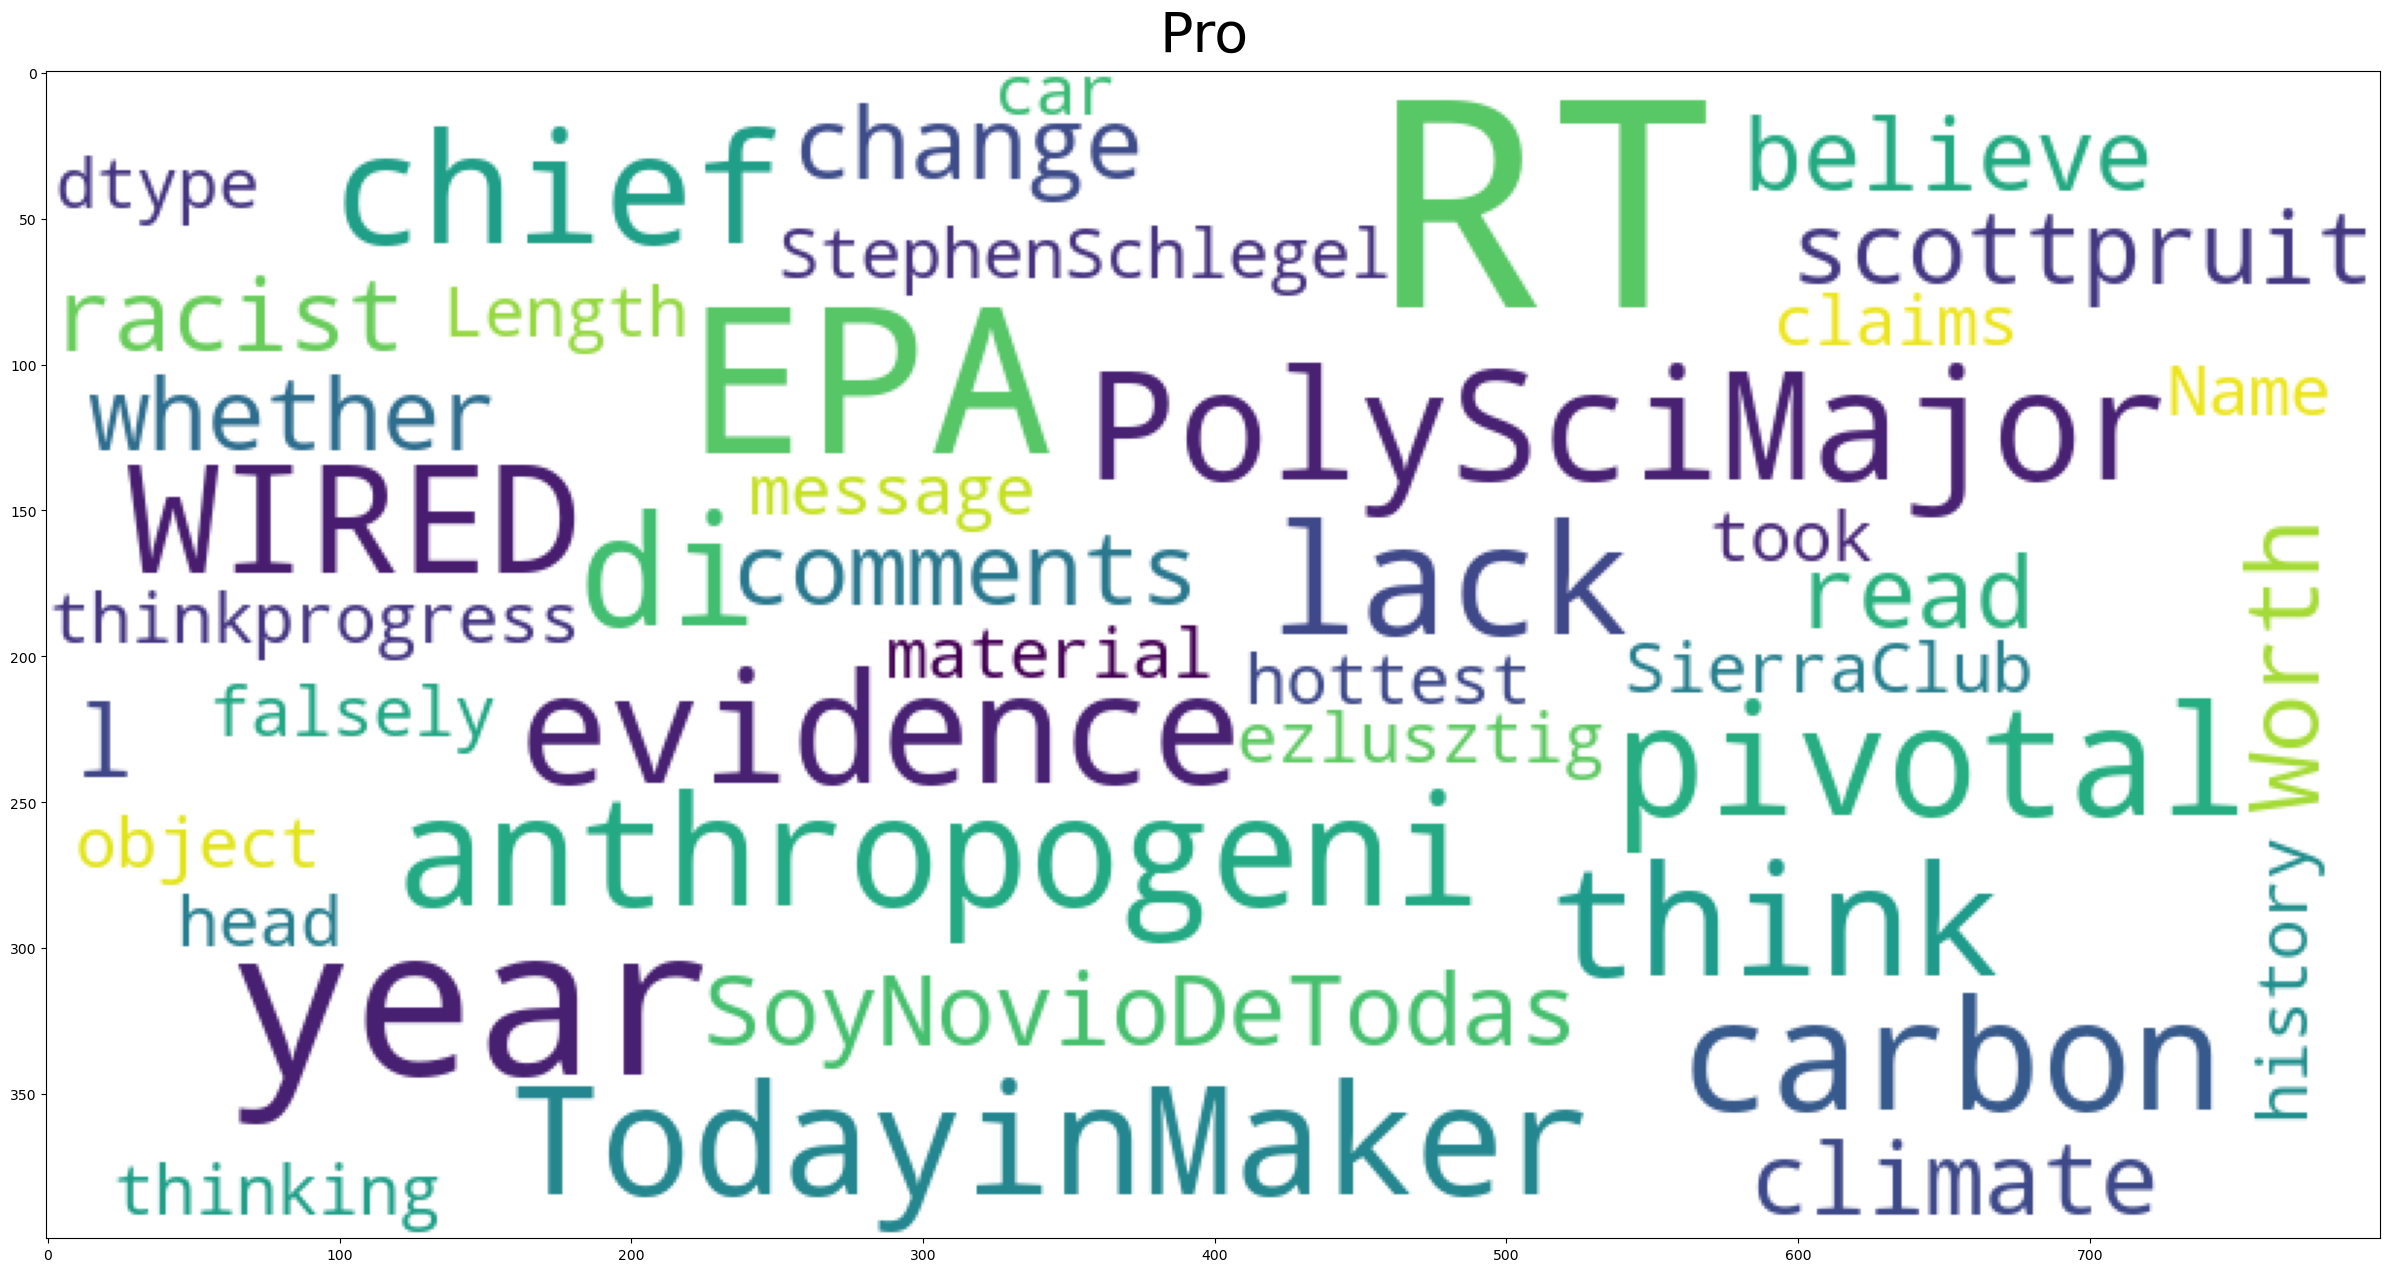

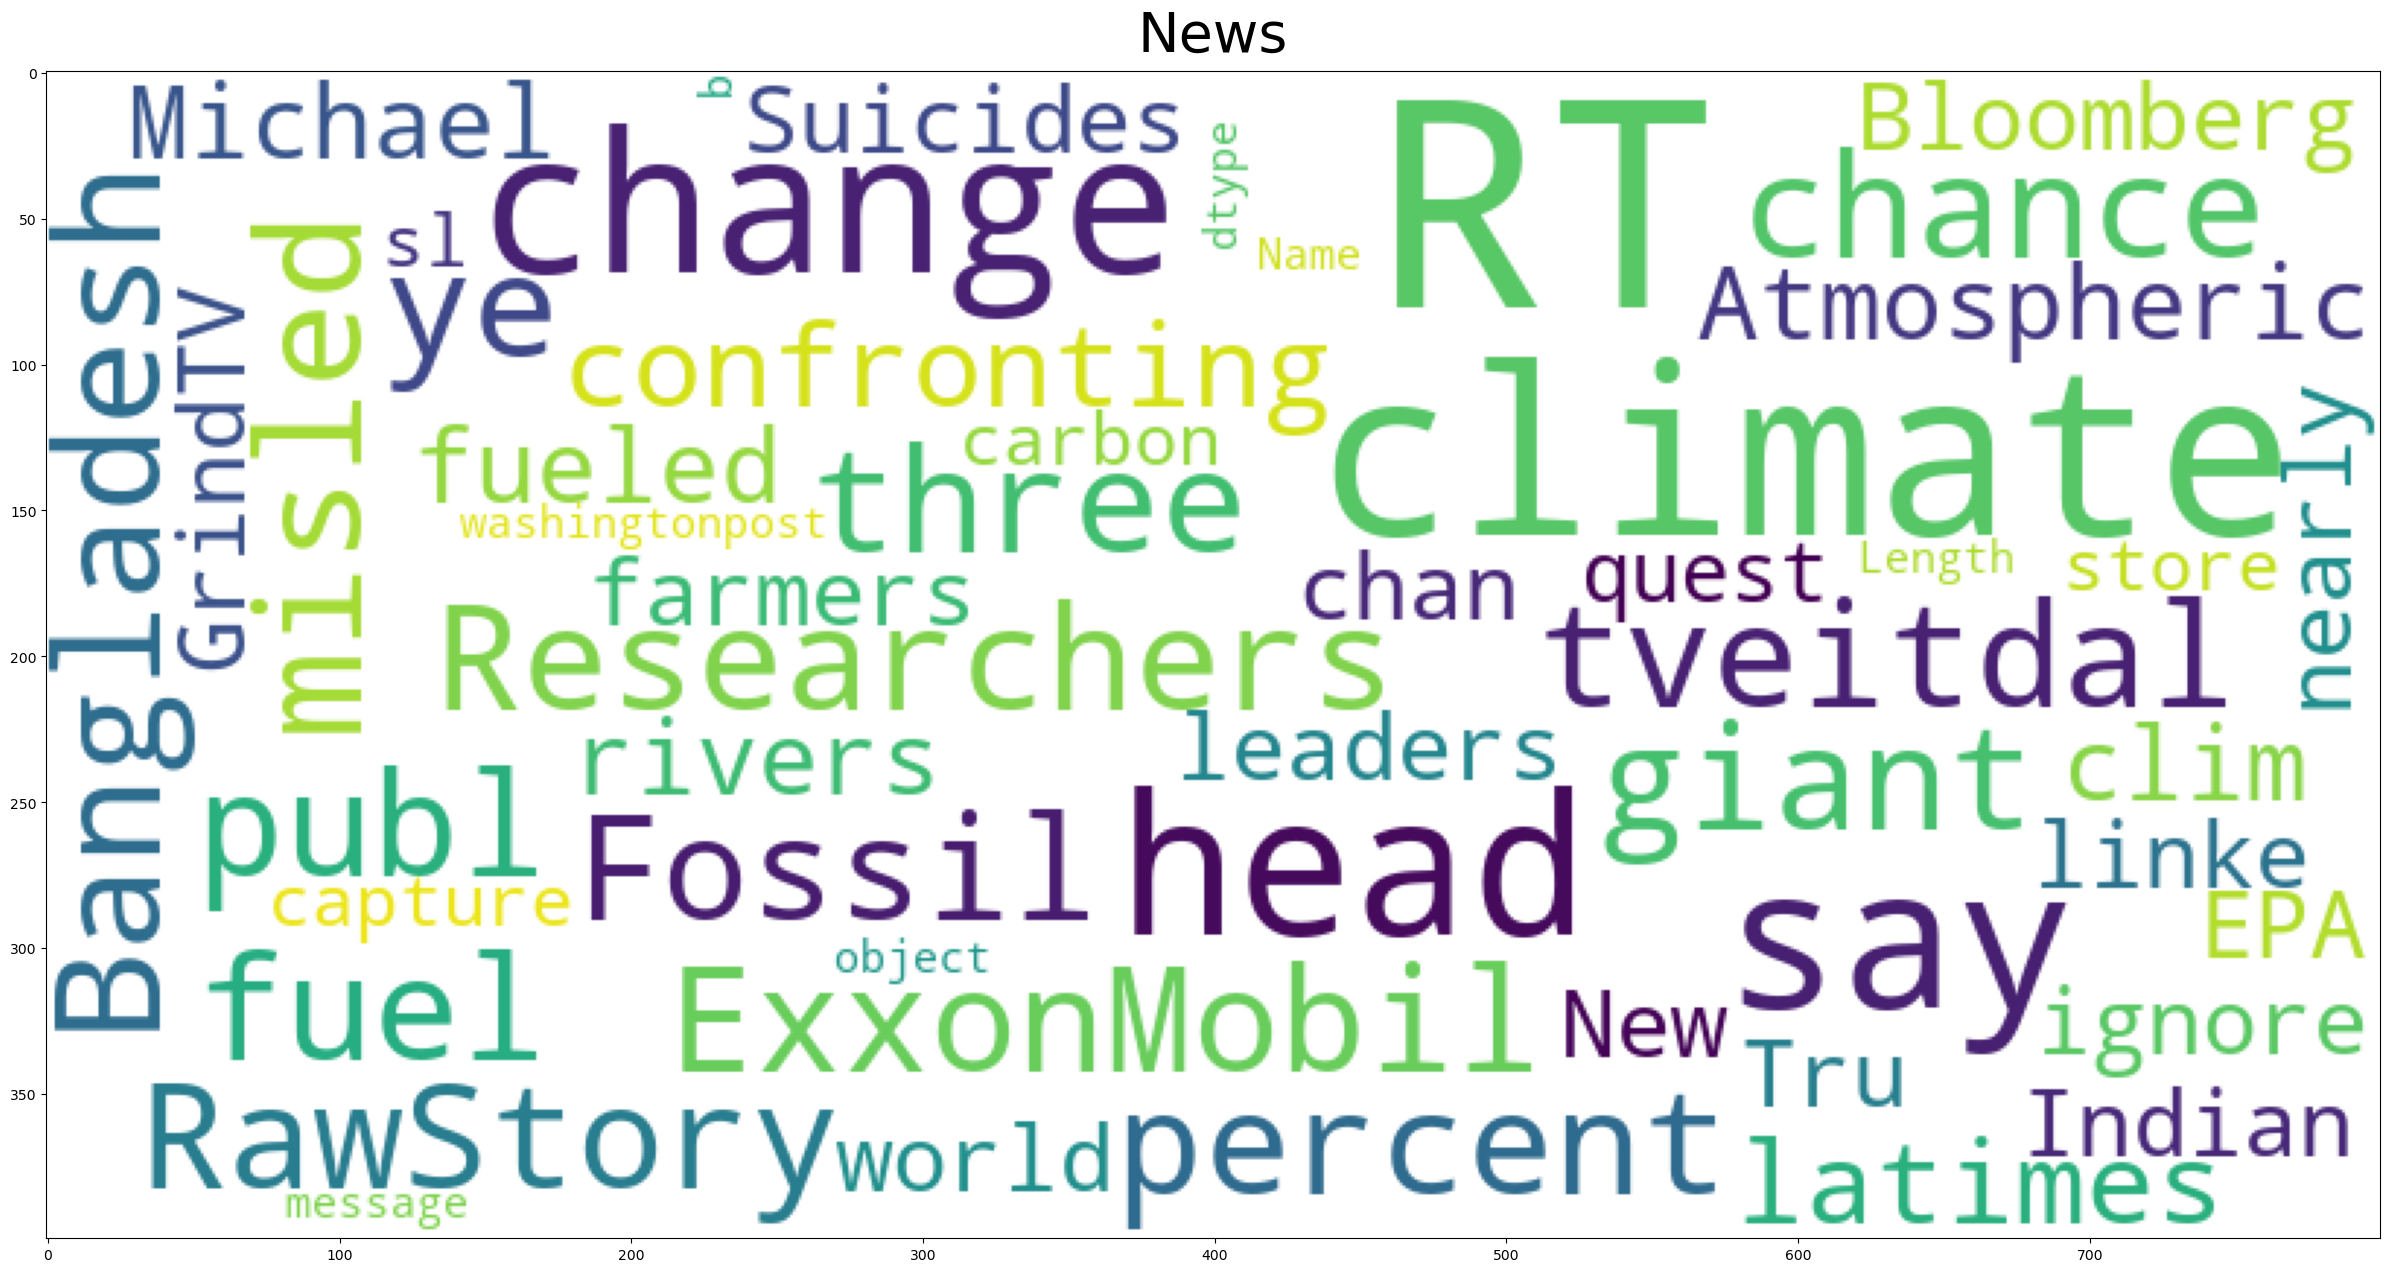

In [52]:
plot_word_cloud(df_train.loc[df_train.sentiment == -1]['message'], title="Anti Climate Change")
plot_word_cloud(df_train.loc[df_train.sentiment == 0]['message'], title="Neutral")
plot_word_cloud(df_train.loc[df_train.sentiment == 1]['message'], title="Pro ")
plot_word_cloud(df_train.loc[df_train.sentiment == 2]['message'], title="News")

#### NOTES

Creating separate word clouds for the different sentiment categories within the DataFrame. Each word cloud provides a visual representation of the most common words in messages associated with the specific sentiment code, making it easier to identify key terms and patterns within each sentiment category.


## 6.Data Preprocessing

In this section functions are defined to clean the data and engineer the features, in order to enhance the quality of the data, mitigate potential issues, and prepare it for meaningful insights or effective machine learning model training.


### 6.1 Data Cleaning & Feature Engineering

In [54]:
# Create a set of English stop words
all_stop = set(stopwords.words('english'))

# Create a nested function to process tweets in train and test datasets
def tweet_processing(tweet):
    def clean_tweet(tweet):  # Function to generate a list of words (hashtags and other punctuations removed)
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    
    new_tweet = clean_tweet(tweet)
    
    # Function to remove stopwords and symbols
    def clean_stopwords(tweet):
        tweet_list = [ele for ele in tweet.split()]
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$|^RT[\s]+|https?:\/\/.*[\r\n]*', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in all_stop]
        return clean_mess
    
    no_punc_tweet = clean_stopwords(new_tweet)
    
    # Function to stem the words in each tweet
    def stemWords(sentenceArrays):
        stemmer = SnowballStemmer('english')
        stemmedSentences = []
        
        for sentenceArray in sentenceArrays:
            stemmedArray = []  # Declare an empty array of words.
            
            for word in sentenceArray:
                stemmedArray.append(stemmer.stem(word))  # Use stemmer instead of ps

            # Convert array back to a sentence of stemmed words.
            delimiter = ' '
            sentence = delimiter.join(stemmedArray)

            # Append stemmed sentence to the list of sentences.
            stemmedSentences.append(sentence)
        return stemmedSentences
    stemmed_words = stemWords(no_punc_tweet)
        
     # Function to lemmatize the words in each tweet
    def lemma(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = [lem.lemmatize(word, 'v') for word in tweet_list]
        return normalized_tweet

    return lemma(stemmed_words)

#### NOTES
The tweet_processing function takes a tweet as input, applies a series of text processing steps including cleaning, removing stopwords and symbols, stemming, and lemmatizing, and returns a list of processed words. These steps are designed to transform raw tweet text into a more refined and standardized format, ready for further analysis, such as sentiment analysis or topic modeling. This processing can enhance the accuracy and efficiency of natural language processing tasks by reducing noise and variations in the text data.

In [55]:
#Apply functions to test and train data to clean and process. 
df_train['processed_message'] = df_train['message'].apply(tweet_processing)
df_test['processed_message'] = df_test['message'].apply(tweet_processing)


## 6.Split the Dataset into Training and Testing Sets

In this section we split the dataset into training and testing sets in the process of building and evaluating the machine learning models. 

In [56]:
#split X and y data for modelling
X = df_train['message']
y = df_train['sentiment']
testX = df_test['message']

#train_test_split on data for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

#### NOTES

20% of the data will be used to tesrt the data, while 80% is used for training. This process is crucial for assessing the performance of the machine learning model on unseen data, helping to prevent overfitting, and ensuring that the model generalizes well to new examples.


## 7.Build a Basic Classification Model

In this section, multiple models are trained to identify and assess the best model. 


In [57]:
# testing different classifiers on dataset and choose best f1 score
classifiers = [
    LinearSVC(),
    LogisticRegression(n_jobs=-1),
    ExtraTreesClassifier(n_jobs=-1),
    RandomForestClassifier(n_jobs=-1),
    GradientBoostingClassifier(),
    KNeighborsClassifier(), 
]

# create a list from assigned models to iterate through and choose best model
names = ['Linear SVC', 'Logistic Regression', 'ExtraTreesClassifier','RandomForestClassifier', 'GradientBoostingClassifier', 'Nearest Neighbors']


In [58]:
results = []
models = {}
confusion = {}
class_report = {}

# A for loop that trains different models and automatically scores their predictions for the final model selection.
for name, clf in zip(names, classifiers):
    print('Fitting {:s} model...'.format(name))

    # Pipeline iterating through all assigned models:
    pipeline = Pipeline([
        ('vect', CountVectorizer(analyzer=tweet_processing)),  # Strings to tokens and then counts tokens on matrix.
        ('tfidf', TfidfTransformer()),  # Counts vectorized tokens and weights classes.
        ('classifier', clf),
    ])
    # Capture the run time of each model
    run_time = %timeit -q -o pipeline.fit(X_train, y_train)

    print('... predicting')
    y_pred = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    print('... scoring')
    f1 = f1_score(y_train, y_pred, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='macro')
    recall = recall_score(y_train, y_pred, average='macro')

    # Save results
    models[name] = clf
    confusion[name] = confusion_matrix(y_train, y_pred)
    class_report[name] = classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Test', 'F1', 'Training Time'])
results.set_index('Classifier', inplace=True)
print('... All done!')

Fitting Linear SVC model...


C:\Users\bonan\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\bonan\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\bonan\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\bonan\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\bonan\anaconda3\Lib\site-packages\sklearn\svm\_clas

... predicting
... scoring
Fitting Logistic Regression model...
... predicting
... scoring
Fitting ExtraTreesClassifier model...
... predicting
... scoring
Fitting RandomForestClassifier model...
... predicting
... scoring
Fitting GradientBoostingClassifier model...


COMET ERROR: Heartbeat processing error
COMET ERROR: Error sending metrics batch (online experiment)


... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
... All done!


In [59]:
results.sort_values('F1 Test', ascending=False)

Accuracy  Precision    Recall   F1 Test        F1  \
Classifier                                                                      
ExtraTreesClassifier        0.999052   0.998573  0.998823  0.998698  0.574986   
RandomForestClassifier      0.999052   0.999015  0.998380  0.998697  0.553383   
Linear SVC                  0.981825   0.985754  0.975036  0.980246  0.648522   
Logistic Regression         0.852944   0.901156  0.733610  0.788749  0.604356   
Nearest Neighbors           0.767523   0.730562  0.688876  0.706452  0.551305   
GradientBoostingClassifier  0.701936   0.793393  0.530221  0.584667  0.519169   

                            Training Time  
Classifier                                 
ExtraTreesClassifier            32.743855  
RandomForestClassifier          25.096824  
Linear SVC                       9.892812  
Logistic Regression             12.763067  
Nearest Neighbors                8.199855  
GradientBoostingClassifier     146.949959

The LINEAR SVC MODEL is the best performing model with the short training time and and high F1 and Precision  score

<Axes: title={'center': 'Performance vs. Training time'}, xlabel='Classifier'>

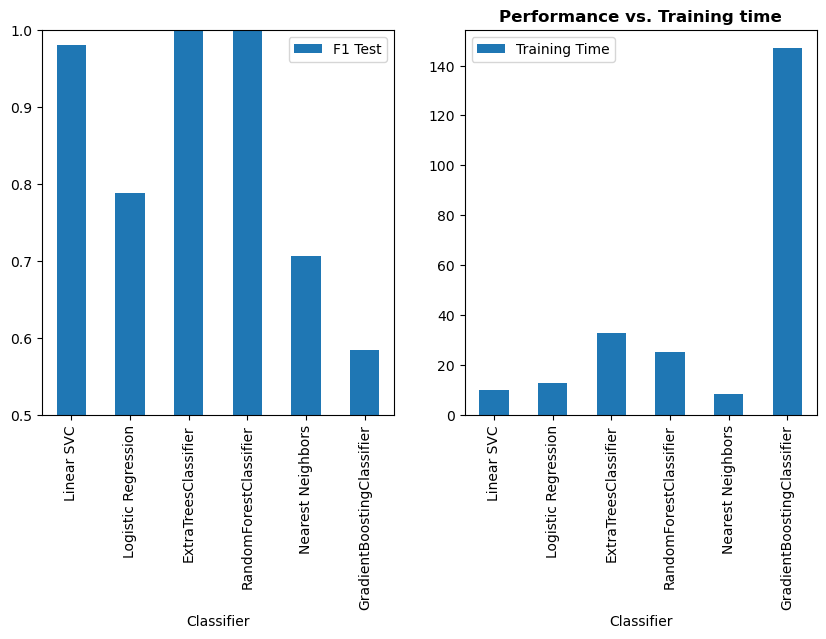

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.title('Performance vs. Training time',fontweight ="bold")
results.sort_values('F1', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.5,1])
results.plot(y='Training Time', kind='bar', ax=ax[1])

The code systematically tests multiple classifiers on the given dataset and prints their F1 scores. The F1 score is used as a performance metric, and the model with the highest F1 score is expected to be selected.

## 8.Evaluate the Model on the Test Set


In [61]:
#create the final Pipeline with pre-processing, weighing and modelling combined into a few lines of code.
best_pipe = Pipeline([
    ('vect',CountVectorizer(analyzer=tweet_processing)),  #tokenize the tweets
    ('tfidf', TfidfTransformer()), #weight the classes
    ('classifier', LinearSVC()),
])
best_pipe.fit(X,y)

C:\Users\bonan\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function tweet_processing at 0x0000024CF61220C0>)),
                ('tfidf', TfidfTransformer()), ('classifier', LinearSVC())])

In [62]:
best_model= 'Linear SVC'
best_model_confusion = confusion[best_model]

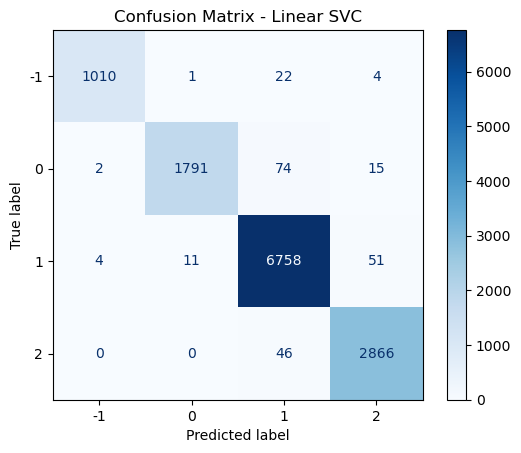

In [63]:
best_model= 'Linear SVC'
best_model_confusion = confusion[best_model]

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=best_model_confusion, display_labels=best_pipe.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - {best_model}')
plt.show()

In [64]:
print(class_report['Linear SVC'])

              precision    recall  f1-score   support

          -1       0.99      0.97      0.98      1037
           0       0.99      0.95      0.97      1882
           1       0.98      0.99      0.98      6824
           2       0.98      0.98      0.98      2912

    accuracy                           0.98     12655
   macro avg       0.99      0.98      0.98     12655
weighted avg       0.98      0.98      0.98     12655



#### NOTES

Created a scikit-learn pipeline that encapsulates tokenization, TF-IDF transformation, and model training using the Linear Support Vector Classifier. The pipeline is then fitted to the training data. Finally, the best model is selected (Linear SVC), and its confusion matrix is retrieved for further analysis or evaluation. This pipeline is a convenient and efficient way to combine multiple steps into a cohesive workflow for training and evaluating a machine learning model.



## 9.Predict Sentiments for the Provided Test Dataset
In this section, the model is tested and used to make predictions using the test data.



In [65]:
#make predictions from fitted model
y_pred = best_pipe.predict(testX)

In [66]:
#create test sentiment column from predictions
df_test['sentiment'] = y_pred.tolist()

#subset columns for output format
df_final_sub = df_test[['tweetid', 'sentiment']]

In [67]:
#view the final submission file
df_final_sub

tweetid  sentiment
0       169760          1
1        35326          1
2       224985          1
3       476263          1
4       872928          0
...        ...        ...
10541   895714          1
10542   875167          1
10543    78329          2
10544   867455          0
10545   470892          1

[10546 rows x 2 columns]

#### NOTES

The code demonstrates the process of making predictions on a test set using the fitted machine learning model (best_pipe). The predicted sentiment values are then added to the test dataset, and a subset of columns is extracted to create the final submission file (df_final_sub). This file contains 'tweetid' and the corresponding predicted sentiment values, making it suitable for submission or further analysis. The resulting DataFrame provides an organized and formatted output that can be easily interpreted or used for evaluation.

### 9.1.Model performance

In this section we compare the best 3 classisfication models that were trained. 

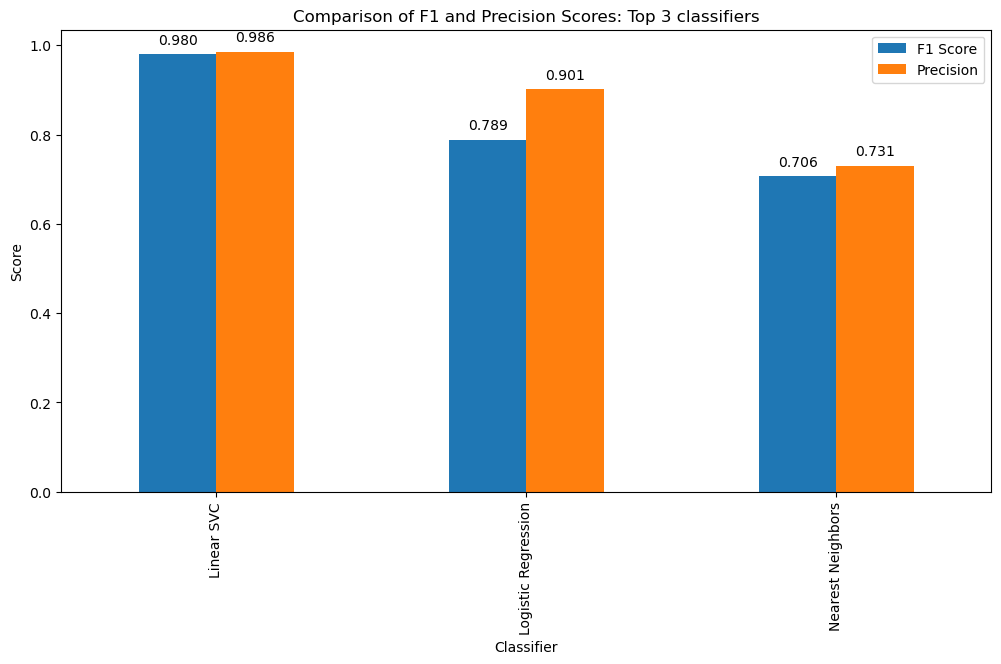

In [68]:
import matplotlib.pyplot as plt

# Filter the results DataFrame for the classifiers of interest
selected_classifiers = ['Linear SVC', 'Logistic Regression', 'Nearest Neighbors']
selected_results = results.loc[selected_classifiers, ['F1 Test', 'Precision']]

# Plot the F1 and Precision scores
fig, ax = plt.subplots(figsize=(12, 6))
selected_results.plot(kind='bar', ax=ax)
ax.set_ylabel('Score')
ax.set_xlabel('Classifier')
ax.set_title('Comparison of F1 and Precision Scores: Top 3 classifiers')

# Display the scores on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add legend
ax.legend(['F1 Score', 'Precision'])

plt.show()

### Log experiment in Comet

In [69]:
params = {"random_state": 42,
          "shuffle": True,
          "test_size": 0.2,
          "model_type": "logreg",
          "scaler": "standard scaler",
          "stratify": True
          }
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision,
           "accuracy": accuracy,
           "f1_test": f1_test,
           "training_time": run_time.best
           }

In [71]:
# Log metrics to Comet.ml
experiment.log_confusion_matrix(matrix=confusion[name], title=f"{name} - Confusion Matrix")
experiment.log_text(f"{name} - Classification Report", class_report[name]) 
experiment.log_parameters(params)
experiment.log_metrics(metrics)


# Seamlessly log your SKLearn model
log_model(experiment, clf,"TheModel")

COMET WARNING: Passed step value '              precision    recall  f1-score   support\n\n          -1       0.73      0.57      0.64      1037\n           0       0.63      0.55      0.59      1882\n           1       0.81      0.85      0.83      6824\n           2       0.75      0.78      0.77      2912\n\n    accuracy                           0.77     12655\n   macro avg       0.73      0.69      0.71     12655\nweighted avg       0.76      0.77      0.76     12655\n' is not a number, ignoring it


In [72]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/bonanimkhari-gmail-com/classification-sprint-2307acds-team-nm1/628275bf2b4d4d2ca44cdf7362644e54
COMET INFO:   Metrics:
COMET INFO:     accuracy      : 0.7675227182931648
COMET INFO:     f1            : 0.7064520862407757
COMET INFO:     f1_test       : 0.5513052898455452
COMET INFO:     precision     : 0.7305619729790037
COMET INFO:     recall        : 0.6888759037654162
COMET INFO:     training_time : 8.199855099897832
COMET INFO:   Parameters:
COMET INFO:     C                                    : 1.0
COMET INFO:     algorithm                            : auto
COMET INFO:     bootstrap                            : True
COMET I

COMET INFO:     learning_rate                        : 0.1
COMET INFO:     loss                                 : squared_hinge
COMET INFO:     max_depth                            : 3
COMET INFO:     max_features                         : None
COMET INFO:     max_iter                             : 1000
COMET INFO:     max_leaf_nodes                       : None
COMET INFO:     max_samples                          : None
COMET INFO:     memory                               : None
COMET INFO:     metric                               : minkowski
COMET INFO:     metric_params                        : None
COMET INFO:     min_impurity_decrease                : 0.0
COMET INFO:     min_samples_leaf                     : 1
COMET INFO:     min_samples_split                    : 2
COMET INFO:     min_weight_fraction_leaf             : 0.0
COMET INFO:     model_type                           : logreg
COMET INFO:     multi_class                          : ovr
COMET INFO:     n_estimators         

The code segment is part of an experiment logging process using Comet.ml. It records various parameters, performance metrics, confusion matrix, classification report, and the trained SKLearn model to Comet.ml. This allows for easy tracking, visualization, and analysis of the experiment results through the Comet.ml platform. The logged information provides a comprehensive overview of the experiment, aiding in the reproducibility and understanding of the machine learning model's behavior.


## 10. Prepare the Submission File



In [73]:
#Export prediction data to .csv for Kaggle submission
df_final_sub.to_csv('nm1_prediction_final.csv', index=False)

## 11. Model Explanations & Conclusions

The three best perfoming models are Linear SVC, logistic regression and .... this is based oon processing time and F1 score

Support Vector Machines (SVMs), including the Linear Support Vector Classifier (Linear SVC), are supervised machine learning models used for classification and regression tasks. In the context of natural language processing (NLP), Linear SVC can be employed for tasks such as text classification as is the case in this project. Linear SVC works by finding an optimal hyperplane that maximizes the margin between classes in a high-dimensional feature space. This hyperplane serves as the decision boundary for classifying new instances, making it a powerful tool for NLP tasks like text classification.



## 12. References

Andfanilo. (2023, December 10). social-media-tutorials. Retrieved from GitHub: https://github.com/andfanilo/social-media-tutorials/blob/master/20220817-streamlit_css_background/streamlit_app.py

Andfanilo. (2023, December 11). streamlit-lottie. Retrieved from GitHub: https://github.com/andfanilo/streamlit-lottie

ExploreAI Academy. (2023, November 28). EA - Twitter Sentiment Classification 2023-2024. Retrieved from Kaggle: https://www.kaggle.com/competitions/ea-twitter-sentiment-classification-2023-2024

Streamlit. (2023, December 7). Documentation. Retrieved from Streamlit: https://docs.streamlit.io/library/api-reference/status/st.success

